# Practice 5. The 2D discrete-time Kalman filter

## [Practice 5-1: Simulation of state and measurement of a 2D vehicle]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

/home/jsyun/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
dT = 0.1  # time step
time_end = 30.0  # end time
time_steps = int(time_end / dT) + 1 # number of time steps
vx_init = 0.0  # initial x velocity
vy_init = 0.0  # initial y velocity
pose_x_init = 1.0  # initial x position
pose_y_init = 1.0  # initial y position

### [Practice 5-1-1]
Please simulate the 𝑥𝑡 , 𝑦𝑡 ,𝑣𝑥 𝑡 , 𝑣𝑦 𝑡 from time 𝑡 = 0 to 𝑡 = 30 using given acceleration data:

In [7]:
# initialize acceleration data
ax = np.zeros(time_steps)
ay = np.zeros(time_steps)

for t in range(time_steps):
    if t * dT < 10:
        ax[t] = 2.0  # acceleration in x direction
        ay[t] = 2.0  # acceleration in y direction
    elif 10 <= t * dT < 20:
        ax[t] = 4.0
        ay[t] = 4.0
    else:
        ax[t] = 2.0
        ay[t] = 2.0

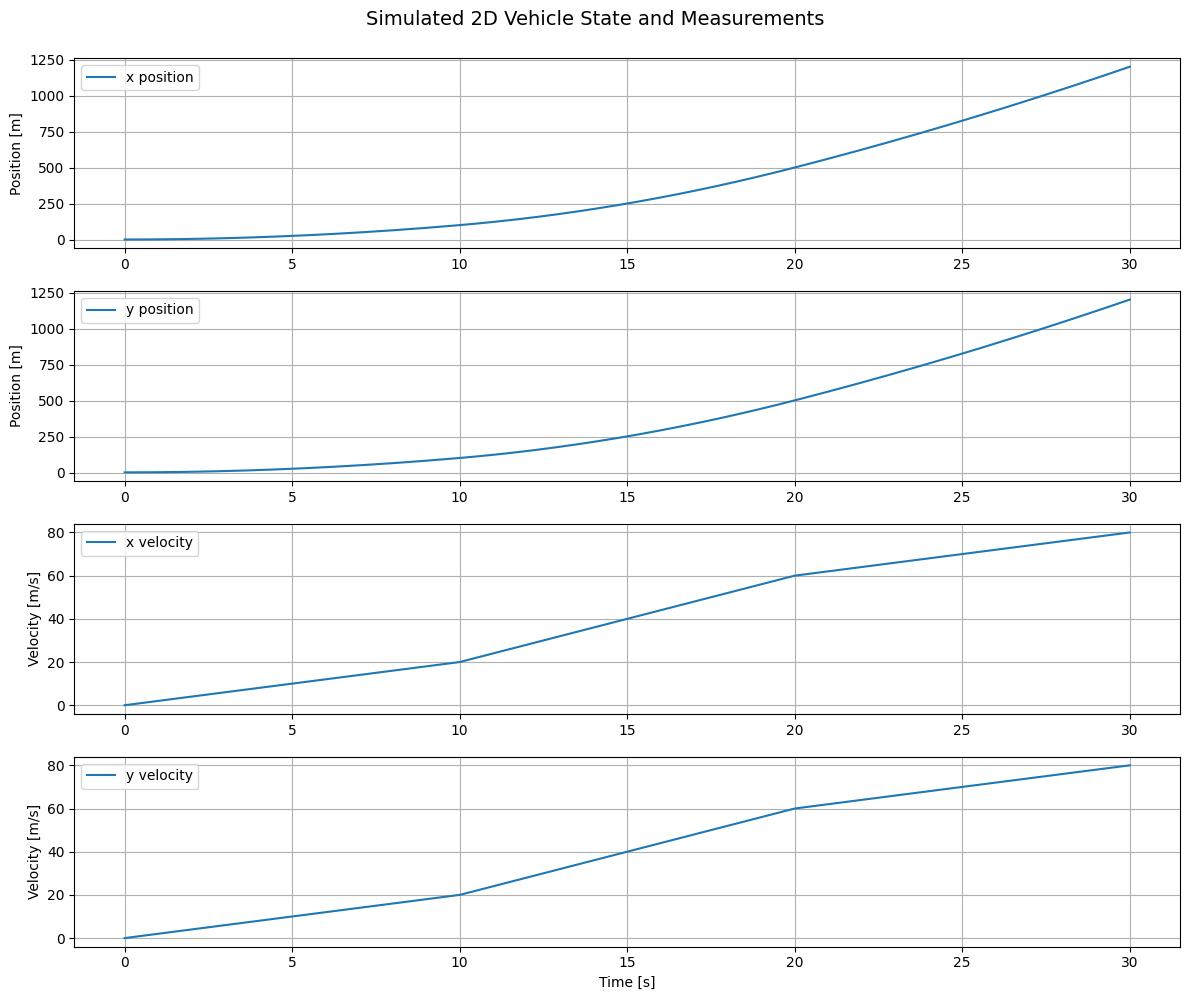

In [19]:
# initialize state and measurement arrays
states = np.zeros((4, time_steps))  # [x_position, y_position, x_velocity, y_velocity]
measurements = np.zeros((2, time_steps))  # [x_position, y_position]
states[:, 0] = [pose_x_init, pose_y_init, vx_init, vy_init] # initial state
measurements[:, 0] = states[:2, 0]  # initial measurement equals initial state
time = np.zeros(time_steps)

F = np.array([
    [1, 0, dT, 0],
    [0, 1, 0, dT],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
]) # state transition matrix

G = np.array([
    [0.5 * dT**2, 0],
    [0, 0.5 * dT**2],
    [dT, 0],
    [0, dT]
]) # control input matrix

H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
]) # measurement matrix

# Simulate the system
for t in range(1, time_steps):
    u = np.array([[ax[t-1]], [ay[t-1]]])  # control input (acceleration)
    states[:, t] = F @ states[:, t-1] + (G @ u).flatten()
    measurements[:, t] = states[:2, t]  # perfect measurement without noise
    time[t] = t * dT

# Plot the simulated states and measurements
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(time, states[0, :], label='x position')
plt.ylabel('Position [m]')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(time, states[1, :], label='y position')
plt.ylabel('Position [m]')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(time, states[2, :], label='x velocity')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(time, states[3, :], label='y velocity')
plt.ylabel('Velocity [m/s]')
plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)

plt.suptitle('Simulated 2D Vehicle State and Measurements', fontsize=14, y=0.995)
plt.tight_layout()

plt.show()

### [Practice 5-1-2]
Please simulate 𝑦𝑡 , which is a position sensor simulation data for the previous simulation. The standard
deviation of the sensor noise is one meter. Plot the simulation results

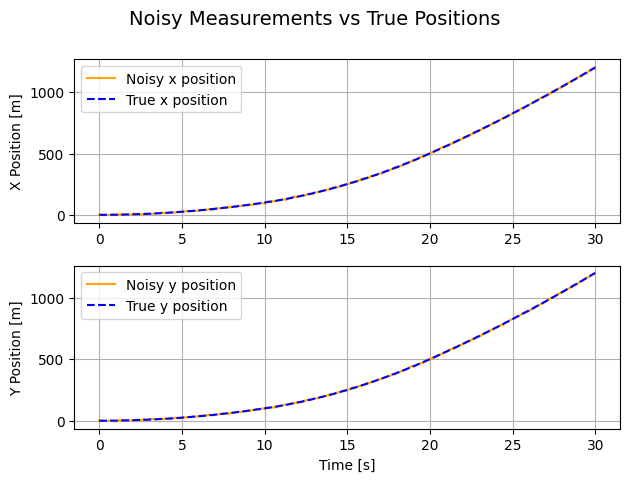

In [27]:
sensor_noise_std = 1.0  # standard deviation of sensor noise

# Add sensor noise to the measurements
for t in range(time_steps):
    noise = np.random.normal(0, sensor_noise_std, size=2)
    measurements[:, t] += noise

# Plot the noisy measurements
plt.subplot(2, 1, 1)
plt.plot(time, measurements[0, :], label='Noisy x position', color='orange')
plt.plot(time, states[0, :], label='True x position', color='blue', linestyle='--')
plt.ylabel('X Position [m]')
plt.legend()
plt.grid(True)  

plt.subplot(2, 1, 2)
plt.plot(time, measurements[1, :], label='Noisy y position', color='orange')
plt.plot(time, states[1, :], label='True y position', color='blue', linestyle='--')
plt.ylabel('Y Position [m]')
plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)  

plt.suptitle('Noisy Measurements vs True Positions', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

## [Practice 5-2: Kalman filter with Constant Velocity (CV) Model]

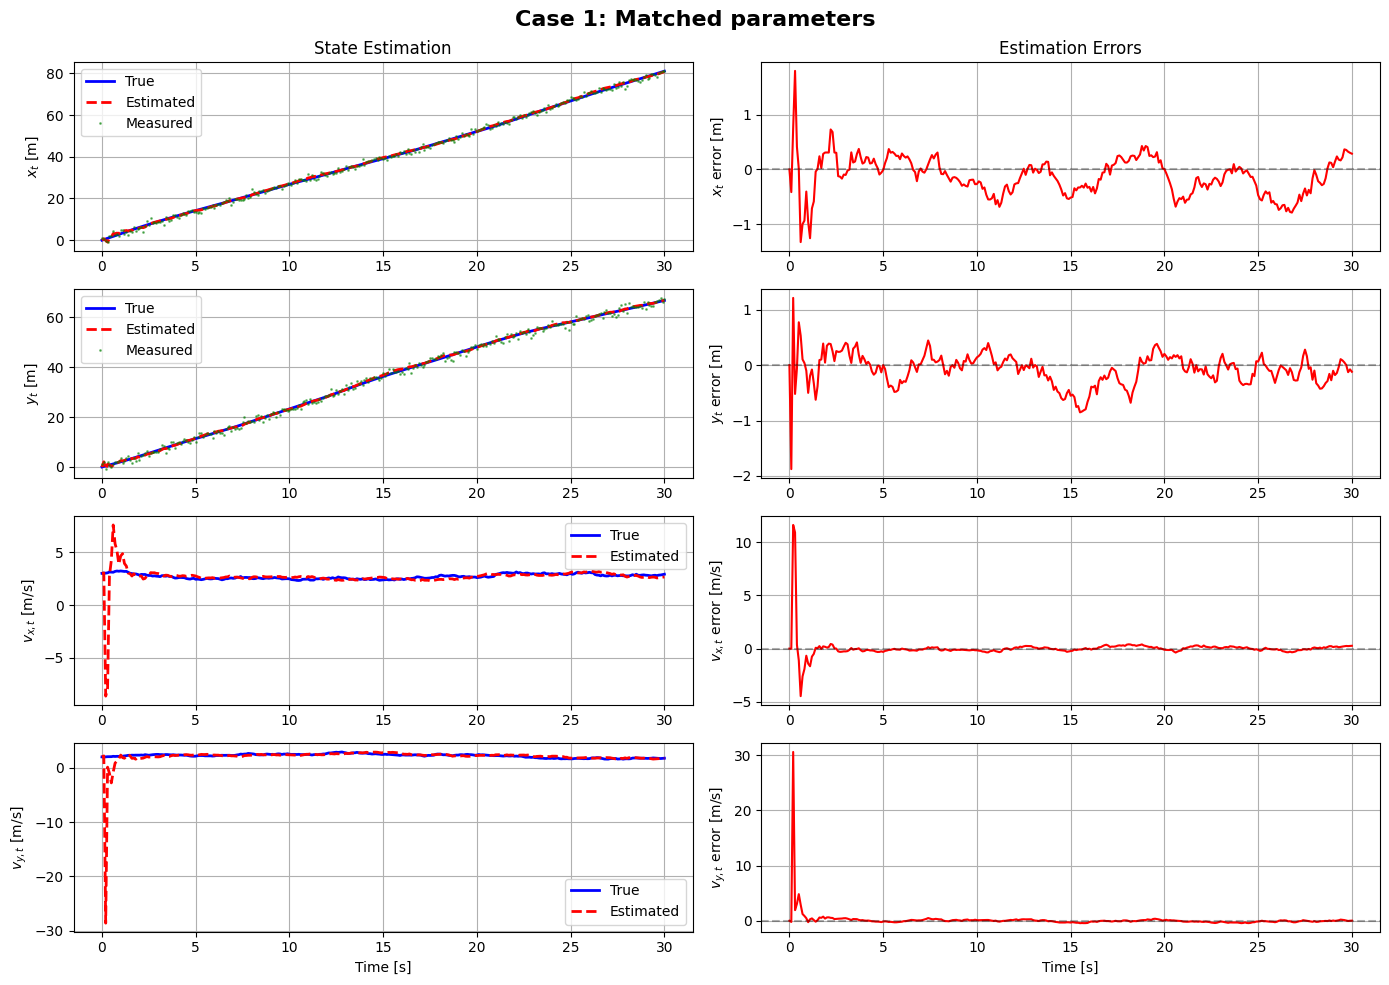

Case 1: Matched parameters
Parameters:
  σ_ax = 0.50, σ_ay = 0.50
  sensor_noise_std = 1.00
----------------------------------------------------------------------
RMSE:
  x position:  0.3699 m
  y position:  0.3037 m
  x velocity:  1.0022 m/s
  y velocity:  1.8215 m/s
  Average:     0.8743



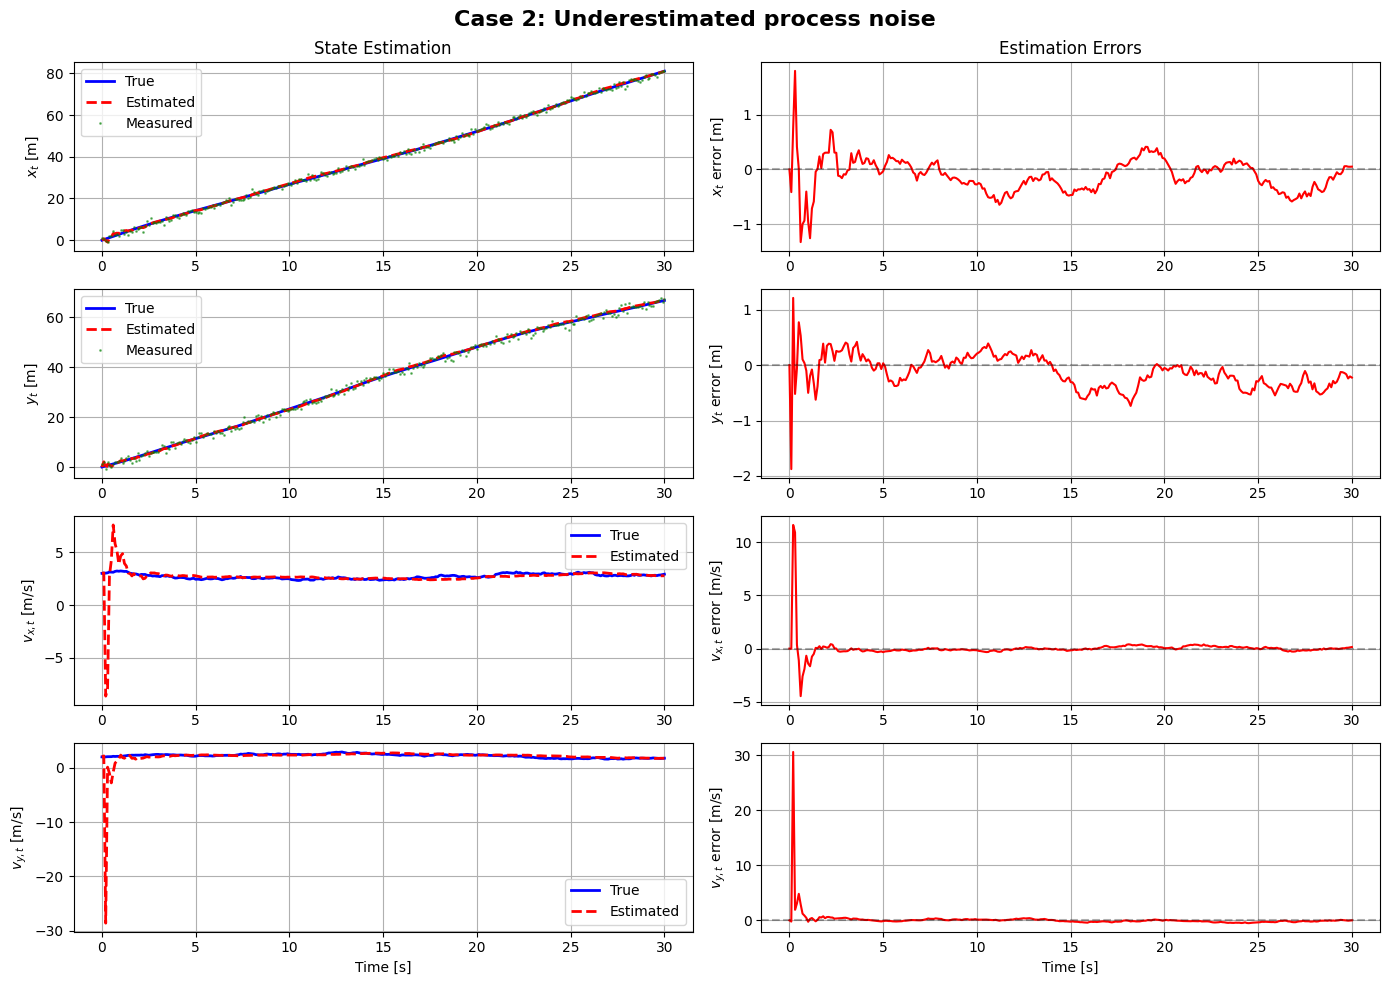

Case 2: Underestimated process noise
Parameters:
  σ_ax = 0.20, σ_ay = 0.20
  sensor_noise_std = 1.00
----------------------------------------------------------------------
RMSE:
  x position:  0.3302 m
  y position:  0.3253 m
  x velocity:  1.0012 m/s
  y velocity:  1.8238 m/s
  Average:     0.8701



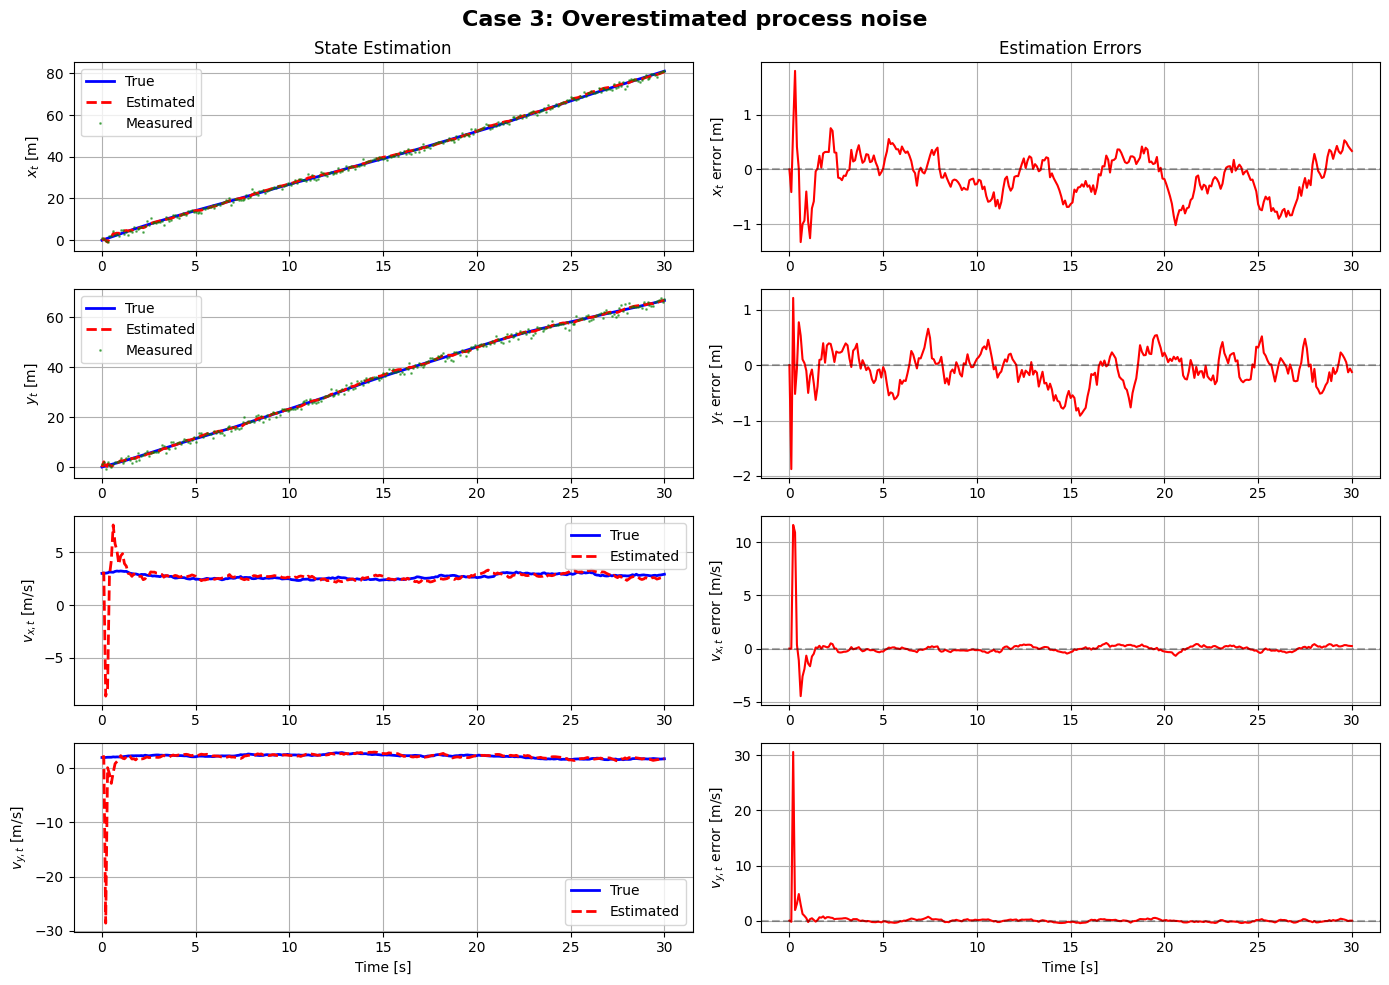

Case 3: Overestimated process noise
Parameters:
  σ_ax = 1.00, σ_ay = 1.00
  sensor_noise_std = 1.00
----------------------------------------------------------------------
RMSE:
  x position:  0.4129 m
  y position:  0.3343 m
  x velocity:  1.0122 m/s
  y velocity:  1.8242 m/s
  Average:     0.8959



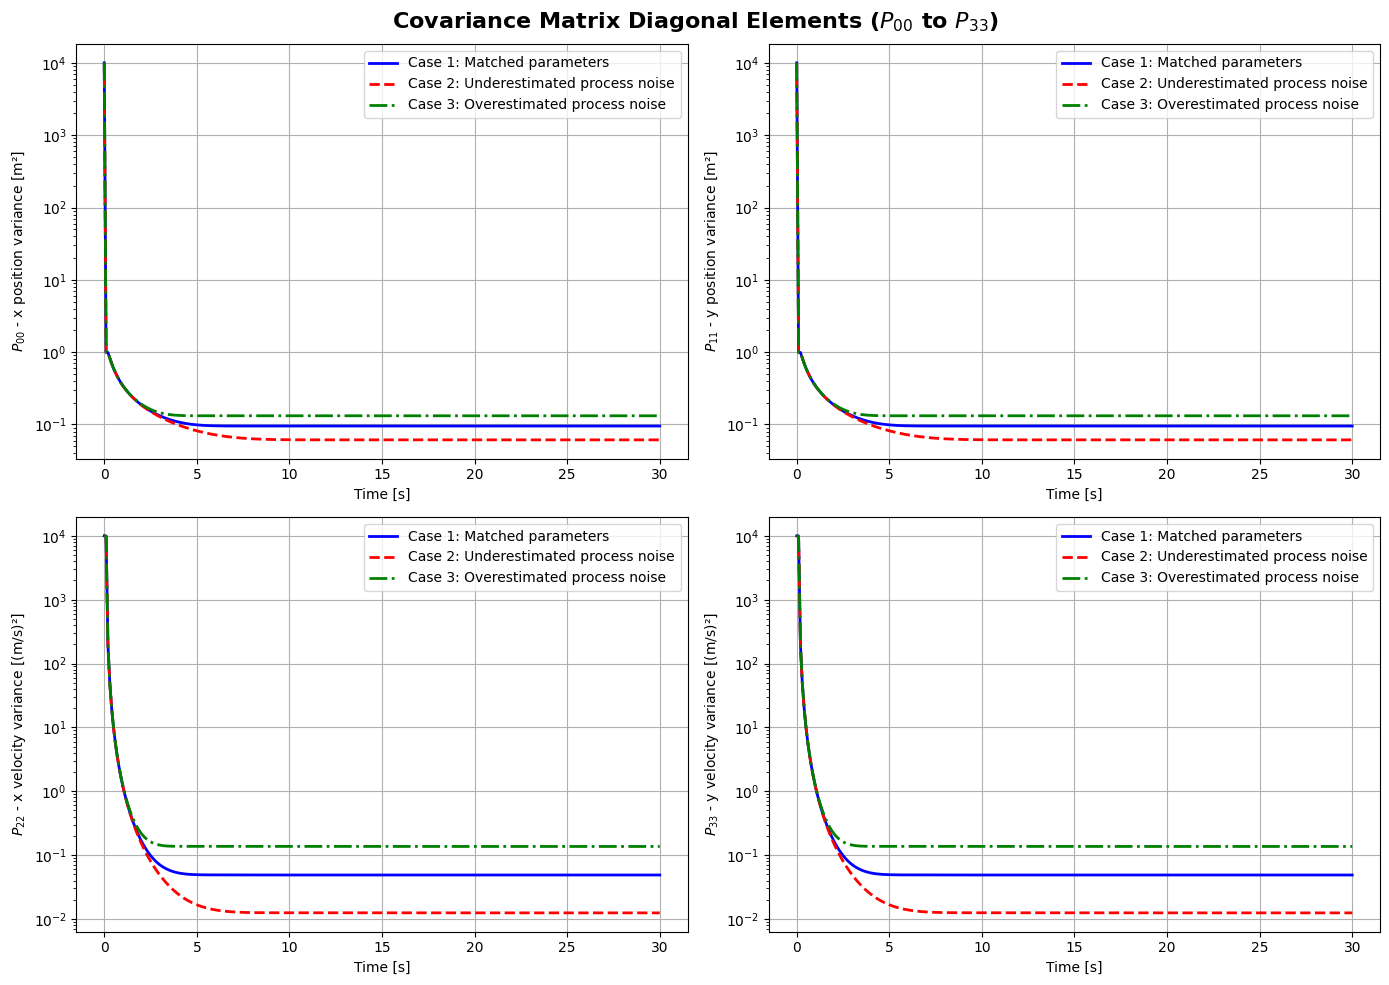


SUMMARY: RMSE Comparison
Case                                     x [m]      y [m]      vx [m/s]   vy [m/s]  
----------------------------------------------------------------------
Case 1                                   0.3699     0.3037     1.0022     1.8215    
Case 2                                   0.3302     0.3253     1.0012     1.8238    
Case 3                                   0.4129     0.3343     1.0122     1.8242    


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dT = 0.1  # time step
time_end = 30.0  # end time
time_steps = int(time_end / dT) + 1  # number of time steps
vx_init = 3.0  # initial x velocity
vy_init = 2.0  # initial y velocity

# Initial conditions (from the problem statement)
x0 = np.array([0, 0, vx_init, vy_init])  # [x, y, vx, vy]
P0 = np.array([
    [10000, 0, 0, 0],
    [0, 10000, 0, 0],
    [0, 0, 10000, 0],
    [0, 0, 0, 10000]
])

# State transition matrix (Constant Velocity Model)
F_cv = np.array([
    [1, 0, dT, 0],
    [0, 1, 0, dT],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Control input matrix
G_cv = np.array([
    [0.5 * dT**2, 0],
    [0, 0.5 * dT**2],
    [dT, 0],
    [0, dT]
])

# Measurement matrix (only position is measured)
H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
])

def create_Q_matrix(sigma_ax, sigma_ay, dT):
    """
    Create process noise covariance matrix Q
    According to the hint in the problem
    """
    Q = np.array([
        [dT**4/2 * sigma_ax**2, 0, dT**3/2 * sigma_ax**2, 0],
        [0, dT**4/2 * sigma_ay**2, 0, dT**3/2 * sigma_ay**2],
        [dT**3/2 * sigma_ax**2, 0, dT**2 * sigma_ax**2, 0],
        [0, dT**3/2 * sigma_ay**2, 0, dT**2 * sigma_ay**2]
    ])
    return Q

def create_R_matrix(sensor_noise_std):
    """
    Create measurement noise covariance matrix R
    """
    R = np.array([
        [sensor_noise_std**2, 0],
        [0, sensor_noise_std**2]
    ])
    return R

def run_kalman_filter(sigma_ax, sigma_ay, sensor_noise_std, 
                       true_states, measurements, x0, P0):
    """
    Run Kalman filter with given parameters
    
    Returns:
        estimated_states: (4, time_steps) array
        P_history: list of covariance matrices at each time step
    """
    time_steps = true_states.shape[1]
    estimated_states = np.zeros((4, time_steps))
    estimated_states[:, 0] = x0
    
    # Create Q and R matrices
    Q = create_Q_matrix(sigma_ax, sigma_ay, dT)
    R = create_R_matrix(sensor_noise_std)
    
    P = P0.copy()
    P_history = [P.copy()]
    
    for t in range(1, time_steps):
        # Prediction Step
        x_pred = F_cv @ estimated_states[:, t-1]
        P_pred = F_cv @ P @ F_cv.T + Q
        
        # Measurement Update Step
        z = measurements[:, t]
        y_tilde = z - (H @ x_pred)  # innovation
        S = H @ P_pred @ H.T + R  # innovation covariance
        K = P_pred @ H.T @ np.linalg.inv(S)  # Kalman gain
        
        # Update State Estimate
        x_est = x_pred + K @ y_tilde
        
        # Update covariance (Joseph form)
        I = np.eye(4)
        P = (I - K @ H) @ P_pred @ (I - K @ H).T + K @ R @ K.T
        
        # Store results
        estimated_states[:, t] = x_est
        P_history.append(P.copy())
    
    return estimated_states, P_history

def calculate_rmse(true_states, estimated_states):
    """
    Calculate RMSE for each state variable
    """
    errors = true_states - estimated_states
    rmse_x = np.sqrt(np.mean(errors[0, :]**2))
    rmse_y = np.sqrt(np.mean(errors[1, :]**2))
    rmse_vx = np.sqrt(np.mean(errors[2, :]**2))
    rmse_vy = np.sqrt(np.mean(errors[3, :]**2))
    
    return rmse_x, rmse_y, rmse_vx, rmse_vy

# Generate true trajectory (same for all cases)
np.random.seed(42)  # For reproducibility

# True process noise parameters
sigma_ax_true = 0.5
sigma_ay_true = 0.5
sensor_noise_std_true = 1.0

# Generate process noise
process_noise_x = np.random.normal(0, sigma_ax_true, time_steps)
process_noise_y = np.random.normal(0, sigma_ay_true, time_steps)

# Generate true states
true_states = np.zeros((4, time_steps))
true_states[:, 0] = x0
time = np.zeros(time_steps)

for t in range(1, time_steps):
    ax_true = process_noise_x[t-1]
    ay_true = process_noise_y[t-1]
    u = np.array([[ax_true], [ay_true]])
    
    true_states[:, t] = F_cv @ true_states[:, t-1] + (G_cv @ u).flatten()
    time[t] = t * dT

# Generate measurements
measurements = np.zeros((2, time_steps))
for t in range(time_steps):
    measurements[:, t] = true_states[:2, t] + np.random.normal(0, sensor_noise_std_true, size=2)

# ============================================================================
# Define test cases for tuning
# ============================================================================
cases = [
    {"name": "Case 1: Matched parameters", 
     "sigma_ax": 0.5, "sigma_ay": 0.5, "sensor_noise_std": 1.0},
    
    {"name": "Case 2: Underestimated process noise", 
     "sigma_ax": 0.2, "sigma_ay": 0.2, "sensor_noise_std": 1.0},
    
    {"name": "Case 3: Overestimated process noise", 
     "sigma_ax": 1.0, "sigma_ay": 1.0, "sensor_noise_std": 1.0},
]

# Run Kalman filter for each case
results = []
for case in cases:
    estimated_states, P_history = run_kalman_filter(
        case["sigma_ax"], case["sigma_ay"], case["sensor_noise_std"],
        true_states, measurements, x0, P0
    )
    
    rmse_x, rmse_y, rmse_vx, rmse_vy = calculate_rmse(true_states, estimated_states)
    
    results.append({
        "name": case["name"],
        "params": case,
        "estimated_states": estimated_states,
        "P_history": P_history,
        "rmse": (rmse_x, rmse_y, rmse_vx, rmse_vy)
    })

# ============================================================================
# Practice 2-1 & 2-2: Plot states and errors, Print RMSE
# ============================================================================
for idx, result in enumerate(results):
    fig, axes = plt.subplots(4, 2, figsize=(14, 10))
    fig.suptitle(result["name"], fontsize=16, fontweight='bold')
    
    errors = true_states - result["estimated_states"]
    
    # Left column: States
    state_labels = ['$x_t$ [m]', '$y_t$ [m]', '$v_{x,t}$ [m/s]', '$v_{y,t}$ [m/s]']
    
    for i in range(4):
        axes[i, 0].plot(time, true_states[i, :], 'b-', label='True', linewidth=2)
        axes[i, 0].plot(time, result["estimated_states"][i, :], 'r--', 
                       label='Estimated', linewidth=2)
        if i < 2:  # Only plot measurements for position
            axes[i, 0].plot(time, measurements[i, :], 'g.', label='Measured', 
                          markersize=2, alpha=0.5)
        axes[i, 0].set_ylabel(state_labels[i])
        axes[i, 0].legend()
        axes[i, 0].grid(True)
        if i == 0:
            axes[i, 0].set_title('State Estimation')
    
    axes[3, 0].set_xlabel('Time [s]')
    
    # Right column: Errors
    error_labels = ['$x_t$ error [m]', '$y_t$ error [m]', 
                    '$v_{x,t}$ error [m/s]', '$v_{y,t}$ error [m/s]']
    
    for i in range(4):
        axes[i, 1].plot(time, errors[i, :], 'r-', linewidth=1.5)
        axes[i, 1].set_ylabel(error_labels[i])
        axes[i, 1].grid(True)
        axes[i, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
        if i == 0:
            axes[i, 1].set_title('Estimation Errors')
    
    axes[3, 1].set_xlabel('Time [s]')
    
    plt.tight_layout()
    plt.show()
    
    # Print RMSE
    print("="*70)
    print(f"{result['name']}")
    print("="*70)
    print(f"Parameters:")
    print(f"  σ_ax = {result['params']['sigma_ax']:.2f}, "
          f"σ_ay = {result['params']['sigma_ay']:.2f}")
    print(f"  sensor_noise_std = {result['params']['sensor_noise_std']:.2f}")
    print("-"*70)
    print(f"RMSE:")
    print(f"  x position:  {result['rmse'][0]:.4f} m")
    print(f"  y position:  {result['rmse'][1]:.4f} m")
    print(f"  x velocity:  {result['rmse'][2]:.4f} m/s")
    print(f"  y velocity:  {result['rmse'][3]:.4f} m/s")
    print(f"  Average:     {sum(result['rmse'])/4:.4f}")
    print("="*70)
    print()

# ============================================================================
# Practice 2-3: Plot covariance matrix diagonal elements (P_00 to P_33)
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Covariance Matrix Diagonal Elements ($P_{00}$ to $P_{33}$)', 
             fontsize=16, fontweight='bold')

diagonal_labels = ['$P_{00}$ - x position variance [m²]',
                   '$P_{11}$ - y position variance [m²]',
                   '$P_{22}$ - x velocity variance [(m/s)²]',
                   '$P_{33}$ - y velocity variance [(m/s)²]']

colors = ['b-', 'r--', 'g-.']
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for diag_idx, (row, col) in enumerate(positions):
    ax = axes[row, col]
    
    for case_idx, result in enumerate(results):
        P_diagonal = [P[diag_idx, diag_idx] for P in result["P_history"]]
        ax.plot(time, P_diagonal, colors[case_idx], 
               label=result["name"], linewidth=2)
    
    ax.set_ylabel(diagonal_labels[diag_idx])
    ax.set_xlabel('Time [s]')
    ax.legend()
    ax.grid(True)
    ax.set_yscale('log')  # Log scale to see convergence better

plt.tight_layout()
plt.show()

# ============================================================================
# Summary comparison table
# ============================================================================
print("\n" + "="*70)
print("SUMMARY: RMSE Comparison")
print("="*70)
print(f"{'Case':<40} {'x [m]':<10} {'y [m]':<10} {'vx [m/s]':<10} {'vy [m/s]':<10}")
print("-"*70)
for result in results:
    case_name = result['name'].split(':')[0]
    rmse = result['rmse']
    print(f"{case_name:<40} {rmse[0]:<10.4f} {rmse[1]:<10.4f} "
          f"{rmse[2]:<10.4f} {rmse[3]:<10.4f}")
print("="*70)

## [Practice 5-3: Kalman filter with Constant Acceledration (CA) Model]

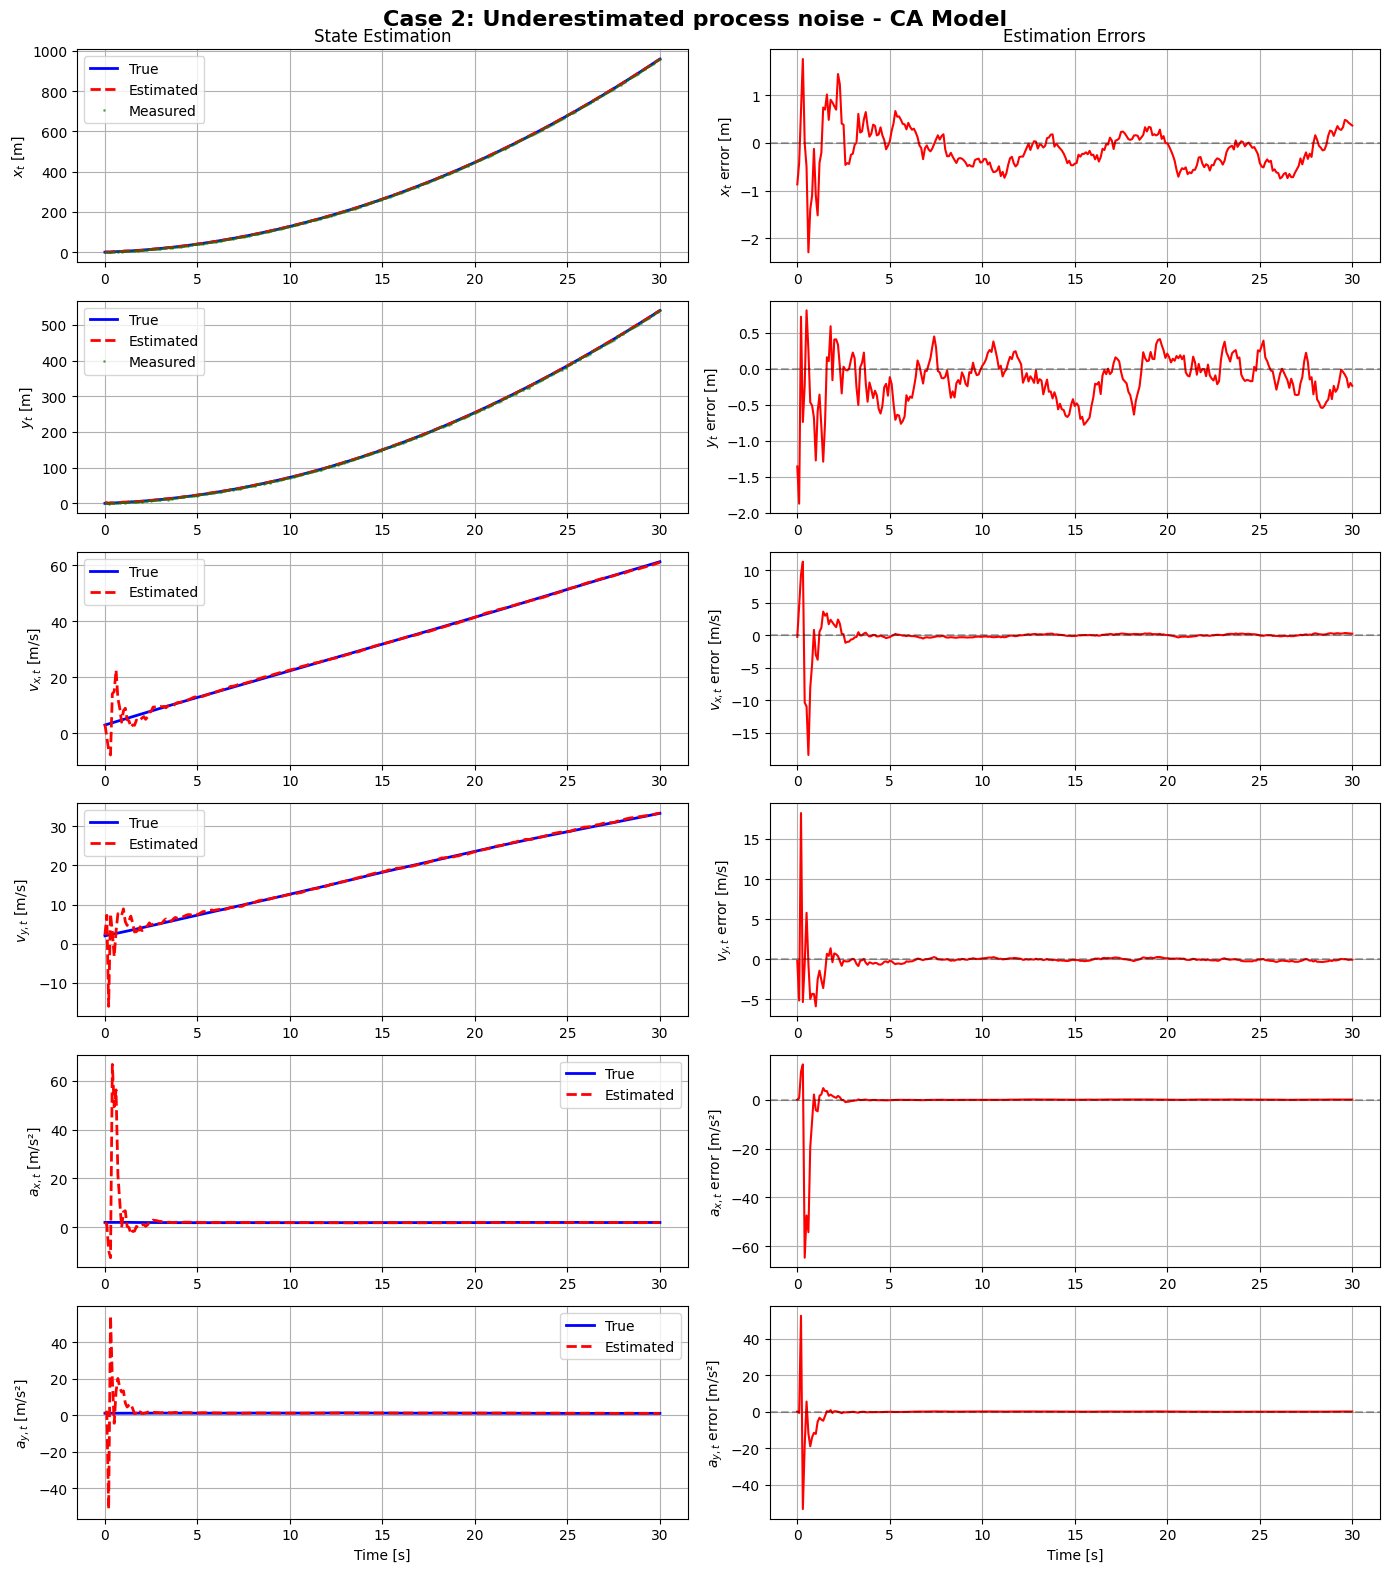

Practice 3-3: RMSE Comparison for CA Model

Case 1: Matched parameters
--------------------------------------------------------------------------------
Parameters:
  σ_jerk_x = 0.10, σ_jerk_y = 0.10
  sensor_noise_std = 1.00
RMSE:
  x position:      0.4643 m
  y position:      0.3745 m
  x velocity:      1.8122 m/s
  y velocity:      1.3762 m/s
  x acceleration:  5.8486 m/s²
  y acceleration:  4.8476 m/s²
  Average RMSE:    2.4539

Case 2: Underestimated process noise
--------------------------------------------------------------------------------
Parameters:
  σ_jerk_x = 0.05, σ_jerk_y = 0.05
  sensor_noise_std = 1.00
RMSE:
  x position:      0.4447 m
  y position:      0.3553 m
  x velocity:      1.8077 m/s
  y velocity:      1.3723 m/s
  x acceleration:  5.8484 m/s²
  y acceleration:  4.8475 m/s²
  Average RMSE:    2.4460

Case 3: Overestimated process noise
--------------------------------------------------------------------------------
Parameters:
  σ_jerk_x = 0.20, σ_jerk_y = 0.2

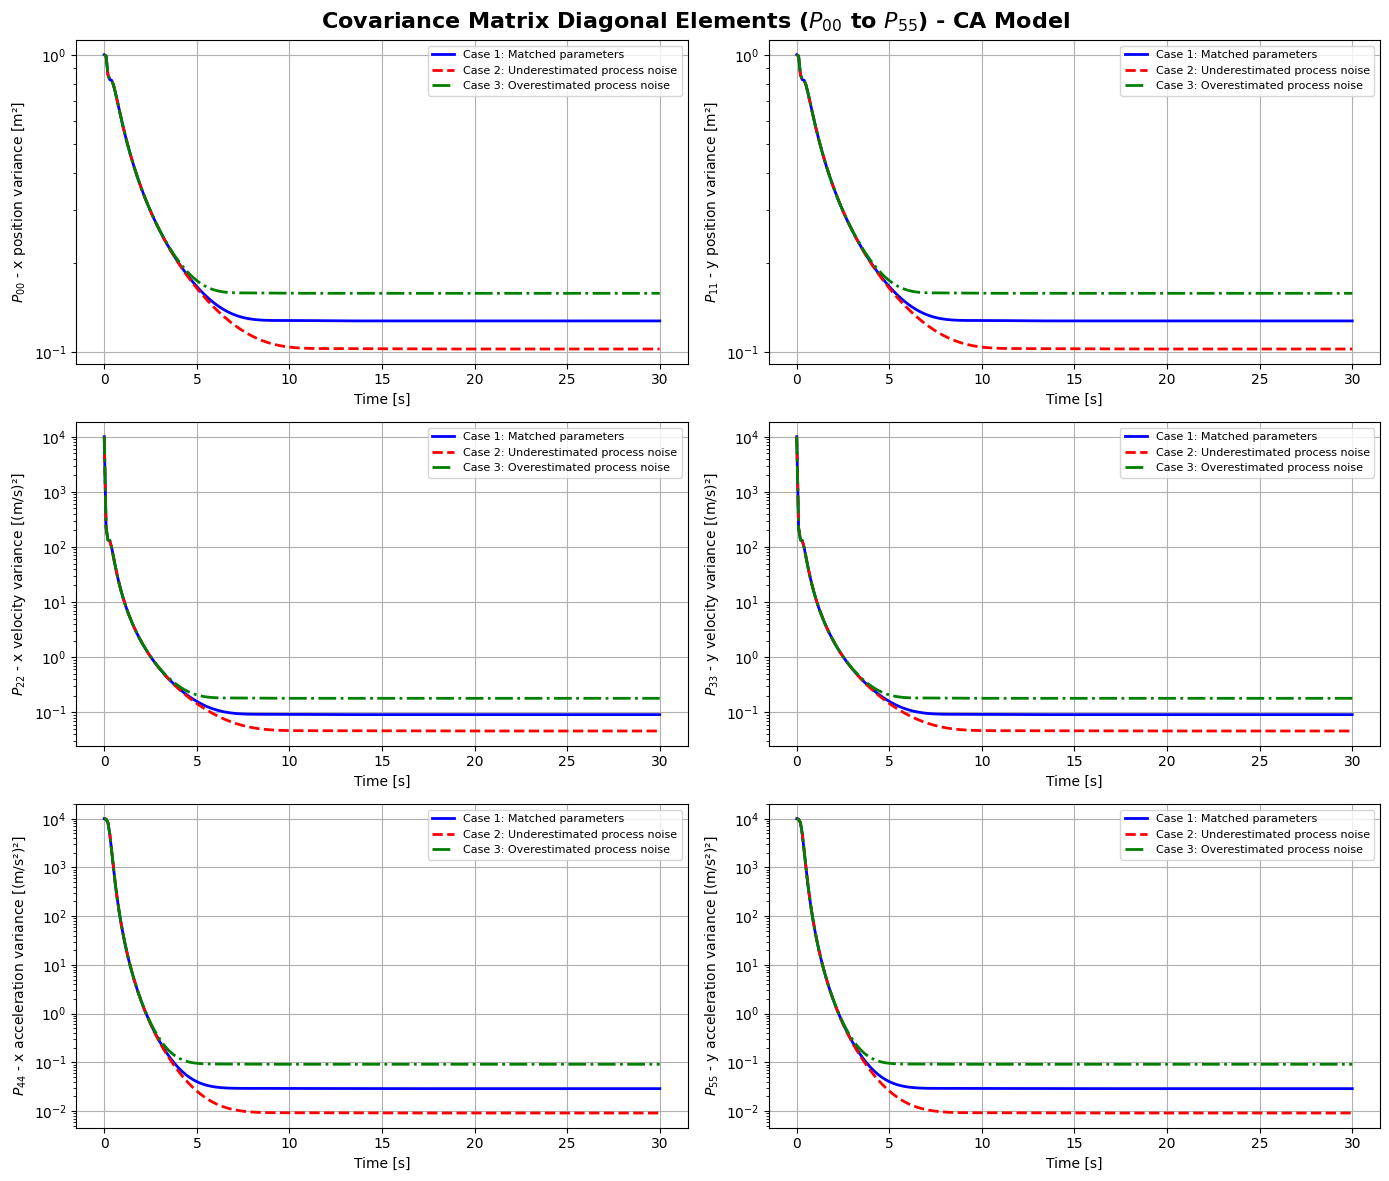


Practice 3-5: Performance Comparison - CV vs CA Model

Key Differences:
--------------------------------------------------------------------------------
CV Model:
  - State: [x, y, vx, vy] (4 states)
  - Assumes constant velocity
  - Process noise: acceleration uncertainty
  - Cannot estimate acceleration

CA Model:
  - State: [x, y, vx, vy, ax, ay] (6 states)
  - Assumes constant acceleration
  - Process noise: jerk (acceleration change) uncertainty
  - Can estimate acceleration directly

Performance Analysis:
--------------------------------------------------------------------------------

Best CV Model Performance (Case 2):
  Position RMSE: x=0.3302 m, y=0.3253 m
  Velocity RMSE: vx=1.0012 m/s, vy=1.8238 m/s
  Average: 0.8701

Best CA Model Performance (Case 2: Underestimated process noise):
  Position RMSE: x=0.4447 m, y=0.3553 m
  Velocity RMSE: vx=1.8077 m/s, vy=1.3723 m/s
  Acceleration RMSE: ax=5.8484 m/s², ay=4.8475 m/s²
  Average (all 6 states): 2.4460
  Average (first 4 sta

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dT = 0.1  # time step
time_end = 30.0  # end time
time_steps = int(time_end / dT) + 1  # number of time steps
vx_init = 3.0  # initial x velocity
vy_init = 2.0  # initial y velocity
ax_init = 2.0  # initial x acceleration
ay_init = 1.0  # initial y acceleration

# Initial conditions (from the problem statement)
x0 = np.array([0, 0, vx_init, vy_init, ax_init, ay_init])  # [x, y, vx, vy, ax, ay]
P0 = np.array([
    [10000, 0, 0, 0, 0, 0],
    [0, 10000, 0, 0, 0, 0],
    [0, 0, 10000, 0, 0, 0],
    [0, 0, 0, 10000, 0, 0],
    [0, 0, 0, 0, 10000, 0],
    [0, 0, 0, 0, 0, 10000]
])

# State transition matrix (Constant Acceleration Model)
F_ca = np.array([
    [1, 0, dT, 0, 0.5 * dT**2, 0],
    [0, 1, 0, dT, 0, 0.5 * dT**2],
    [0, 0, 1, 0, dT, 0],
    [0, 0, 0, 1, 0, dT],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

# Process noise matrix G for CA model
G_ca = np.array([
    [dT**3/6, 0],   # jerk -> x position
    [0, dT**3/6],   # jerk -> y position
    [dT**2/2, 0],   # jerk -> x velocity
    [0, dT**2/2],   # jerk -> y velocity
    [dT, 0],        # jerk -> x acceleration
    [0, dT]         # jerk -> y acceleration
])

# Measurement matrix (only position is measured)
H = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
])

def create_Q_matrix(sigma_jerk_x, sigma_jerk_y, dT):
    """
    Create process noise covariance matrix Q for Constant Acceleration Model
    sigma_jerk is the standard deviation of jerk (acceleration change rate)
    """
    Q = np.array([
        [dT**5/20 * sigma_jerk_x**2, 0, dT**4/8 * sigma_jerk_x**2, 0, dT**3/6 * sigma_jerk_x**2, 0],
        [0, dT**5/20 * sigma_jerk_y**2, 0, dT**4/8 * sigma_jerk_y**2, 0, dT**3/6 * sigma_jerk_y**2],
        [dT**4/8 * sigma_jerk_x**2, 0, dT**3/3 * sigma_jerk_x**2, 0, dT**2/2 * sigma_jerk_x**2, 0],
        [0, dT**4/8 * sigma_jerk_y**2, 0, dT**3/3 * sigma_jerk_y**2, 0, dT**2/2 * sigma_jerk_y**2],
        [dT**3/6 * sigma_jerk_x**2, 0, dT**2/2 * sigma_jerk_x**2, 0, dT * sigma_jerk_x**2, 0],
        [0, dT**3/6 * sigma_jerk_y**2, 0, dT**2/2 * sigma_jerk_y**2, 0, dT * sigma_jerk_y**2]
    ])
    return Q

def create_R_matrix(sensor_noise_std):
    """
    Create measurement noise covariance matrix R
    """
    R = np.array([
        [sensor_noise_std**2, 0],
        [0, sensor_noise_std**2]
    ])
    return R

def run_kalman_filter_ca(sigma_jerk_x, sigma_jerk_y, sensor_noise_std, 
                         true_states, measurements, x0, P0):
    """
    Run Kalman filter with Constant Acceleration Model with given parameters
    Returns:
        estimated_states: (6, time_steps) array
        P_history: list of covariance matrices at each time step
    """
    Q = create_Q_matrix(sigma_jerk_x, sigma_jerk_y, dT)
    R = create_R_matrix(sensor_noise_std)
    estimated_states = np.zeros((6, time_steps))
    P_history = []

    x_est = x0.copy()
    P = P0.copy()

    for k in range(time_steps):
        # Prediction
        x_pred = F_ca @ x_est
        P_pred = F_ca @ P @ F_ca.T + Q

        # Update
        y = measurements[:, k] - H @ x_pred
        S = H @ P_pred @ H.T + R
        K = P_pred @ H.T @ np.linalg.inv(S)
        x_est = x_pred + K @ y
        
        # Joseph form for numerical stability
        I = np.eye(6)
        P = (I - K @ H) @ P_pred @ (I - K @ H).T + K @ R @ K.T

        estimated_states[:, k] = x_est.copy()
        P_history.append(P.copy())

    return estimated_states, P_history

def calculate_rmse_ca(true_states, estimated_states):
    """
    Calculate RMSE for each state variable
    """
    errors = true_states - estimated_states
    rmse_x = np.sqrt(np.mean(errors[0, :]**2))
    rmse_y = np.sqrt(np.mean(errors[1, :]**2))
    rmse_vx = np.sqrt(np.mean(errors[2, :]**2))
    rmse_vy = np.sqrt(np.mean(errors[3, :]**2))
    rmse_ax = np.sqrt(np.mean(errors[4, :]**2))
    rmse_ay = np.sqrt(np.mean(errors[5, :]**2))
    
    return rmse_x, rmse_y, rmse_vx, rmse_vy, rmse_ax, rmse_ay

# Generate true trajectory (same for all cases)
np.random.seed(42)  # For reproducibility

# True process noise parameters (jerk noise for CA model)
sigma_jerk_true = 0.1  # jerk noise standard deviation [m/s³]
sensor_noise_std_true = 1.0  # sensor noise standard deviation [m]

# Generate jerk noise
jerk_noise_x = np.random.normal(0, sigma_jerk_true, time_steps)
jerk_noise_y = np.random.normal(0, sigma_jerk_true, time_steps)

# Generate true states
true_states = np.zeros((6, time_steps))
true_states[:, 0] = x0
time = np.zeros(time_steps)

for t in range(1, time_steps):
    # Jerk noise (acceleration change rate)
    jerk_x = jerk_noise_x[t-1]
    jerk_y = jerk_noise_y[t-1]
    w = np.array([[jerk_x], [jerk_y]])  # process noise (jerk)
    
    # State propagation: NO control input, only process noise
    true_states[:, t] = F_ca @ true_states[:, t-1] + (G_ca @ w).flatten()
    time[t] = t * dT

# Generate measurements
measurements = np.zeros((2, time_steps))
for t in range(time_steps):
    measurements[:, t] = true_states[:2, t] + np.random.normal(0, sensor_noise_std_true, size=2)

# ============================================================================
# Define test cases for tuning
# ============================================================================
cases = [
    {"name": "Case 1: Matched parameters", 
     "sigma_jerk_x": 0.1, "sigma_jerk_y": 0.1, "sensor_noise_std": 1.0},
    
    {"name": "Case 2: Underestimated process noise", 
     "sigma_jerk_x": 0.05, "sigma_jerk_y": 0.05, "sensor_noise_std": 1.0},
    
    {"name": "Case 3: Overestimated process noise", 
     "sigma_jerk_x": 0.2, "sigma_jerk_y": 0.2, "sensor_noise_std": 1.0},
]

# Run Kalman filter for each case
results = []
for case in cases:
    estimated_states, P_history = run_kalman_filter_ca(
        case["sigma_jerk_x"], case["sigma_jerk_y"], case["sensor_noise_std"],
        true_states, measurements, x0, P0
    )
    
    rmse_x, rmse_y, rmse_vx, rmse_vy, rmse_ax, rmse_ay = calculate_rmse_ca(true_states, estimated_states)
    
    results.append({
        "name": case["name"],
        "params": case,
        "estimated_states": estimated_states,
        "P_history": P_history,
        "rmse": (rmse_x, rmse_y, rmse_vx, rmse_vy, rmse_ax, rmse_ay)
    })

# ============================================================================
# Practice 3-2: Plot estimated states and errors for best Q, R
# ============================================================================
# Find best case (lowest average RMSE)
best_idx = np.argmin([np.mean(r["rmse"]) for r in results])
best_result = results[best_idx]

fig, axes = plt.subplots(6, 2, figsize=(14, 16))
fig.suptitle(f'{best_result["name"]} - CA Model', fontsize=16, fontweight='bold')

errors = true_states - best_result["estimated_states"]

state_labels = ['$x_t$ [m]', '$y_t$ [m]', '$v_{x,t}$ [m/s]', '$v_{y,t}$ [m/s]', 
                '$a_{x,t}$ [m/s²]', '$a_{y,t}$ [m/s²]']

for i in range(6):
    # Left column: States
    axes[i, 0].plot(time, true_states[i, :], 'b-', label='True', linewidth=2)
    axes[i, 0].plot(time, best_result["estimated_states"][i, :], 'r--', 
                   label='Estimated', linewidth=2)
    if i < 2:  # Only plot measurements for position
        axes[i, 0].plot(time, measurements[i, :], 'g.', label='Measured', 
                      markersize=2, alpha=0.5)
    axes[i, 0].set_ylabel(state_labels[i])
    axes[i, 0].legend()
    axes[i, 0].grid(True)
    if i == 0:
        axes[i, 0].set_title('State Estimation')

axes[5, 0].set_xlabel('Time [s]')

# Right column: Errors
error_labels = ['$x_t$ error [m]', '$y_t$ error [m]', 
                '$v_{x,t}$ error [m/s]', '$v_{y,t}$ error [m/s]',
                '$a_{x,t}$ error [m/s²]', '$a_{y,t}$ error [m/s²]']

for i in range(6):
    axes[i, 1].plot(time, errors[i, :], 'r-', linewidth=1.5)
    axes[i, 1].set_ylabel(error_labels[i])
    axes[i, 1].grid(True)
    axes[i, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    if i == 0:
        axes[i, 1].set_title('Estimation Errors')

axes[5, 1].set_xlabel('Time [s]')

plt.tight_layout()
plt.show()

# ============================================================================
# Practice 3-3: Print RMSE for each case
# ============================================================================
print("="*80)
print("Practice 3-3: RMSE Comparison for CA Model")
print("="*80)

for result in results:
    print(f"\n{result['name']}")
    print("-"*80)
    print(f"Parameters:")
    print(f"  σ_jerk_x = {result['params']['sigma_jerk_x']:.2f}, "
          f"σ_jerk_y = {result['params']['sigma_jerk_y']:.2f}")
    print(f"  sensor_noise_std = {result['params']['sensor_noise_std']:.2f}")
    print(f"RMSE:")
    print(f"  x position:      {result['rmse'][0]:.4f} m")
    print(f"  y position:      {result['rmse'][1]:.4f} m")
    print(f"  x velocity:      {result['rmse'][2]:.4f} m/s")
    print(f"  y velocity:      {result['rmse'][3]:.4f} m/s")
    print(f"  x acceleration:  {result['rmse'][4]:.4f} m/s²")
    print(f"  y acceleration:  {result['rmse'][5]:.4f} m/s²")
    print(f"  Average RMSE:    {np.mean(result['rmse']):.4f}")

print("\n" + "="*80)
print("Summary Table")
print("="*80)
print(f"{'Case':<40} {'x[m]':<10} {'y[m]':<10} {'vx[m/s]':<10} {'vy[m/s]':<10} "
      f"{'ax[m/s²]':<10} {'ay[m/s²]':<10}")
print("-"*80)
for result in results:
    case_name = result['name'].split(':')[0]
    rmse = result['rmse']
    print(f"{case_name:<40} {rmse[0]:<10.4f} {rmse[1]:<10.4f} {rmse[2]:<10.4f} "
          f"{rmse[3]:<10.4f} {rmse[4]:<10.4f} {rmse[5]:<10.4f}")
print("="*80)

# ============================================================================
# Practice 3-4: Plot covariance matrix diagonal elements (P_00 to P_55)
# ============================================================================
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Covariance Matrix Diagonal Elements ($P_{00}$ to $P_{55}$) - CA Model', 
             fontsize=16, fontweight='bold')

diagonal_labels = ['$P_{00}$ - x position variance [m²]',
                   '$P_{11}$ - y position variance [m²]',
                   '$P_{22}$ - x velocity variance [(m/s)²]',
                   '$P_{33}$ - y velocity variance [(m/s)²]',
                   '$P_{44}$ - x acceleration variance [(m/s²)²]',
                   '$P_{55}$ - y acceleration variance [(m/s²)²]']

colors = ['b-', 'r--', 'g-.']
positions = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

for diag_idx, (row, col) in enumerate(positions):
    ax = axes[row, col]
    
    for case_idx, result in enumerate(results):
        P_diagonal = [P[diag_idx, diag_idx] for P in result["P_history"]]
        ax.plot(time, P_diagonal, colors[case_idx], 
               label=result["name"], linewidth=2)
    
    ax.set_ylabel(diagonal_labels[diag_idx])
    ax.set_xlabel('Time [s]')
    ax.legend(fontsize=8)
    ax.grid(True)
    ax.set_yscale('log')  # Log scale to see convergence better

plt.tight_layout()
plt.show()

# ============================================================================
# Practice 3-5: Performance comparison between CV and CA models
# ============================================================================
print("\n" + "="*80)
print("Practice 3-5: Performance Comparison - CV vs CA Model")
print("="*80)

print("\nKey Differences:")
print("-"*80)
print("CV Model:")
print("  - State: [x, y, vx, vy] (4 states)")
print("  - Assumes constant velocity")
print("  - Process noise: acceleration uncertainty")
print("  - Cannot estimate acceleration")

print("\nCA Model:")
print("  - State: [x, y, vx, vy, ax, ay] (6 states)")
print("  - Assumes constant acceleration")
print("  - Process noise: jerk (acceleration change) uncertainty")
print("  - Can estimate acceleration directly")

print("\nPerformance Analysis:")
print("-"*80)

# Calculate best performance from each model
# For CV model (from Practice 2), use Case 2 RMSE values
cv_best_rmse = {
    'x': 0.3302, 'y': 0.3253, 'vx': 1.0012, 'vy': 1.8238
}

# For CA model, use the best case
ca_best_rmse = results[best_idx]['rmse']

print(f"\nBest CV Model Performance (Case 2):")
print(f"  Position RMSE: x={cv_best_rmse['x']:.4f} m, y={cv_best_rmse['y']:.4f} m")
print(f"  Velocity RMSE: vx={cv_best_rmse['vx']:.4f} m/s, vy={cv_best_rmse['vy']:.4f} m/s")
print(f"  Average: {np.mean(list(cv_best_rmse.values())):.4f}")

print(f"\nBest CA Model Performance ({results[best_idx]['name']}):")
print(f"  Position RMSE: x={ca_best_rmse[0]:.4f} m, y={ca_best_rmse[1]:.4f} m")
print(f"  Velocity RMSE: vx={ca_best_rmse[2]:.4f} m/s, vy={ca_best_rmse[3]:.4f} m/s")
print(f"  Acceleration RMSE: ax={ca_best_rmse[4]:.4f} m/s², ay={ca_best_rmse[5]:.4f} m/s²")
print(f"  Average (all 6 states): {np.mean(ca_best_rmse):.4f}")
print(f"  Average (first 4 states, comparable to CV): {np.mean(ca_best_rmse[:4]):.4f}")

print("\nComparison:")
print("-"*80)
print("Position Accuracy:")
if (ca_best_rmse[0] + ca_best_rmse[1])/2 < (cv_best_rmse['x'] + cv_best_rmse['y'])/2:
    print("  ✓ CA model has better position accuracy")
else:
    print("  ✓ CV model has better position accuracy")

print("\nVelocity Accuracy:")
if (ca_best_rmse[2] + ca_best_rmse[3])/2 < (cv_best_rmse['vx'] + cv_best_rmse['vy'])/2:
    print("  ✓ CA model has better velocity accuracy")
else:
    print("  ✓ CV model has better velocity accuracy")

print("\nAdditional Capabilities:")
print("  ✓ CA model can estimate acceleration (CV model cannot)")
print(f"    Acceleration RMSE: ax={ca_best_rmse[4]:.4f} m/s², ay={ca_best_rmse[5]:.4f} m/s²")

print("\nWhen to Use Each Model:")
print("-"*80)
print("Use CV Model when:")
print("  - Motion is approximately constant velocity")
print("  - Computational efficiency is critical (fewer states)")
print("  - Acceleration information is not needed")

print("\nUse CA Model when:")
print("  - Motion includes acceleration")
print("  - Acceleration estimation is required")
print("  - Higher accuracy is needed (with more computational cost)")
print("  - Vehicle dynamics include acceleration control")

print("\nComputational Comparison:")
print("-"*80)
print(f"CV Model: 4×4 matrices, 4 states to estimate")
print(f"CA Model: 6×6 matrices, 6 states to estimate")
print(f"Computational cost ratio: ~{(6**3)/(4**3):.2f}x more for CA model")

print("="*80)